### dataset - Kaggle
## link: https://www.kaggle.com/datasets/kazanova/sentiment140

In [1]:
import pandas as pd    

In [2]:
column =["Target","id","time","flag","user","tweet"]
originaldata = pd.read_csv("twittersentiment.csv",encoding='latin')
originaldata.columns=column

In [3]:
originaldata.head()

,Target,id,time,flag,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Cleaning

In [4]:
#removing the unwanted columns : id , time, flag,user
data = originaldata
data = data.drop(["id","time","flag","user"],axis=1)
data.head()

,Target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
#removing for nan or null values - since our data depends on only the tweet column, is its nan or null, it doesnt provide any info
#hence we are removing
data.isna().sum()

Target    0
tweet     0
dtype: int64

In [6]:
data.isnull().sum()

Target    0
tweet     0
dtype: int64

## Analyze and visualize

In [7]:
# from the website:
# 4- positive
# 2- neutral
# 0- negative
data["Target"].value_counts()

4    800000
0    799999
Name: Target, dtype: int64

In [8]:
#graph
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

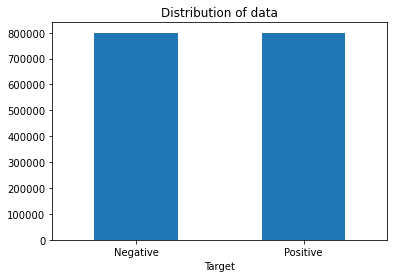

In [9]:
# Plotting the distribution for dataset.
ax = data.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['tweet']), list(data['Target'])

In [10]:
dfnegative = data.loc[data['Target']== 0]
dfnegative.head()

,Target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [11]:
dfpositive = data.loc[data['Target']== 4]

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
data['Target'].unique()

array([0, 4], dtype=int64)

In [15]:
data['tweet']=data['tweet'].str.lower()
data['tweet'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: tweet, dtype: object

In [16]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [17]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [18]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['tweet'] = data['tweet'].apply(lambda text: cleaning_stopwords(text))
data['tweet'].head()

0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, it's not behaving all. i'...
4                             @kwesidei not whole crew
Name: tweet, dtype: object

In [19]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['tweet']= data['tweet'].apply(lambda x: cleaning_punctuations(x))
data['tweet'].head()

0    upset cant update facebook texting it might cr...
1    kenichan dived many times ball managed save 50...
2                     whole body feels itchy like fire
3    nationwideclass no its not behaving all im mad...
4                              kwesidei not whole crew
Name: tweet, dtype: object

In [20]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['tweet'] = data['tweet'].apply(lambda x: cleaning_repeating_char(x))
data['tweet'].head()

0    upset cant update facebook texting it might cr...
1    kenichan dived many times ball managed save 50...
2                     whole body feels itchy like fire
3    nationwideclass no its not behaving all im mad...
4                              kwesidei not whole crew
Name: tweet, dtype: object

In [21]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['tweet'] = data['tweet'].apply(lambda x: cleaning_URLs(x))
data['tweet'].head()

0    upset cant update facebook texting it might cr...
1    kenichan dived many times ball managed save 50...
2                     whole body feels itchy like fire
3    nationwideclass no its not behaving all im mad...
4                              kwesidei not whole crew
Name: tweet, dtype: object

In [22]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['tweet'] = data['tweet'].apply(lambda x: cleaning_numbers(x))
data['tweet'].head()

0    upset cant update facebook texting it might cr...
1    kenichan dived many times ball managed save  r...
2                     whole body feels itchy like fire
3    nationwideclass no its not behaving all im mad...
4                              kwesidei not whole crew
Name: tweet, dtype: object

In [23]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
data['tweet'] = data['tweet'].apply(tokenizer.tokenize)
data['tweet'].head()

0           []
1           []
2          [w]
3          [w]
4    [w, w, w]
Name: tweet, dtype: object

In [24]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['tweet']= data['tweet'].apply(lambda x: stemming_on_text(x))
data['tweet'].head()

0           []
1           []
2          [w]
3          [w]
4    [w, w, w]
Name: tweet, dtype: object

In [25]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['tweet'] = data['tweet'].apply(lambda x: lemmatizer_on_text(x))
data['tweet'].head()

0           []
1           []
2          [w]
3          [w]
4    [w, w, w]
Name: tweet, dtype: object

In [26]:
X=data.tweet
y=data.Target

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [28]:

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction = clf.predict(X_test)
print(accuracy_score(y_test,prediction))

ValueError: setting an array element with a sequence.

In [9]:
#breaking sentences down to small tokens
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
#The fit_on_texts() method creates an association between the words and the assigned numbers. 
#This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
tokenizer.fit_on_texts(data['tweet'])

In [10]:
data['tweet'].head()

0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: tweet, dtype: object

In [11]:
#replace the  with the numbers
encoded_docs = tokenizer.texts_to_sequences(data['tweet'])

In [12]:
#making each sentence with equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [13]:
print(padded_sequence)

[[   0    0    0 ...   40  273 1170]
 [   0    0    0 ...   37   31   12]
 [   0    0    0 ...   71   13 1169]
 ...
 [   0    0    0 ...   14   11 2107]
 [   0    0    0 ...  501   12   50]
 [   0    0    0 ...    0    0  119]]


## Spliting data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequence,data["Target"], test_size=0.33, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

## Algorithms
##### 1. Linear Regression
##### 2. Support Vector Machines
##### 3. RNN derivatives LSTM and GRU.

In [16]:
#linear regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction = clf.predict(X_test)
print(accuracy_score(y_test,prediction))

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5222575757575758


In [ ]:
#SVM - linear
from sklearn import svm
lsvm = svm.SVC()
lsvm.fit(X_.train, y_train)
prediction = lsvm.predict(X_test)
print(accuracy_score(y_test,prediction))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print(accuracy_score(y_pred, y_test))

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [40]:

import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True